# Pandas reference
https://learning.oreilly.com/library/view/python-for-data/9781449323592/ch05.html

# COVID Case study (from MT2-Sample 19)


In [150]:
import pandas as pd
import numpy as np
import os
# For visualization:
from matplotlib.pyplot import figure, plot, semilogy, grid, legend
%matplotlib inline

In [205]:
# Load datafile


def load_covid_data_file (fname) :
    covid_us = pd.read_csv(fname)
    cols = covid_us.columns
    print ('\nCOVID US DATAFILE ', fname, covid_us.shape); #display(covid_us.head(3))
    #print ('COLUMNS: ', cols)
    #print(type(covid_us['Last_Update'].loc[0])) # Confirm that these values are strings

    # get only required cols
    _req_cols = ["Province_State", "Country_Region", "Last_Update", "Confirmed" ]
    _cols = covid_us.columns
    _has_req_cols =  all(elem in _cols  for elem in _req_cols)
    assert (_has_req_cols)
    #print ('OK. Required cols are present')
    covid_us = covid_us[_req_cols]

    # fix cols
    covid_us = covid_us.rename(columns={"Last_Update": "Timestamp"})

    # fix timestamp
    covid_us['Timestamp'] = pd.to_datetime(covid_us['Timestamp'])

    # fix confirmed
    covid_us['Confirmed'] = covid_us['Confirmed'].fillna(0).astype('int')

    # fix State names
    covid_us.Province_State = covid_us.Province_State.str.replace(' ', '')


    # drop dups and NAs
    covid_us = covid_us.drop_duplicates()

    # filter only US data -- this should alredy be true
    is_us = (covid_us["Country_Region"] == "US")
    covid_us = covid_us[is_us]

    # sorty by confirmed
    covid_us = covid_us.sort_values(by=['Confirmed', 'Country_Region'], ascending=False)


    covid_us.reset_index()

    #covid_us.head(10)

    return covid_us

def load_covid_data_files (fnames) :
    df_merged = pd.DataFrame()
    for fname in fnames:
        df = load_covid_data_file(fname)
        df_merged = pd.concat([df_merged, df])
    return df_merged




In [206]:

covid_data_dir = 'data/covid19/csse_covid_19_daily_reports_us'
covid_files = []
with os.scandir(covid_data_dir) as files:
    covid_files = [ covid_data_dir + '/' + fname.name for fname in files ]
print(len(covid_files), covid_files[:10])

# load first 40 files -- get some error otherwise.
covid_df = load_covid_data_files (covid_files[:40])
print (covid_df.shape)
covid_df.head(3)

356 ['data/covid19/csse_covid_19_daily_reports_us/03-25-2021.csv', 'data/covid19/csse_covid_19_daily_reports_us/03-24-2021.csv', 'data/covid19/csse_covid_19_daily_reports_us/06-07-2020.csv', 'data/covid19/csse_covid_19_daily_reports_us/06-06-2020.csv', 'data/covid19/csse_covid_19_daily_reports_us/02-19-2021.csv', 'data/covid19/csse_covid_19_daily_reports_us/10-01-2020.csv', 'data/covid19/csse_covid_19_daily_reports_us/02-18-2021.csv', 'data/covid19/csse_covid_19_daily_reports_us/09-22-2020.csv', 'data/covid19/csse_covid_19_daily_reports_us/09-23-2020.csv', 'data/covid19/csse_covid_19_daily_reports_us/08-20-2020.csv']

COVID US DATAFILE  data/covid19/csse_covid_19_daily_reports_us/03-25-2021.csv (58, 18)

COVID US DATAFILE  data/covid19/csse_covid_19_daily_reports_us/03-24-2021.csv (58, 18)

COVID US DATAFILE  data/covid19/csse_covid_19_daily_reports_us/06-07-2020.csv (58, 18)

COVID US DATAFILE  data/covid19/csse_covid_19_daily_reports_us/06-06-2020.csv (58, 18)

COVID US DATAFILE  dat

,Province_State,Country_Region,Timestamp,Confirmed
5,California,US,2021-03-26 05:30:37,3653168
49,Texas,US,2021-03-26 05:30:37,2769451
11,Florida,US,2021-03-26 05:30:37,2027429


,Province_State,Country_Region,Timestamp,Confirmed
49,Texas,US,2021-03-26 05:30:37,2769451
49,Texas,US,2021-03-25 05:30:43,2766259
49,Texas,US,2020-06-08 03:33:42,75697


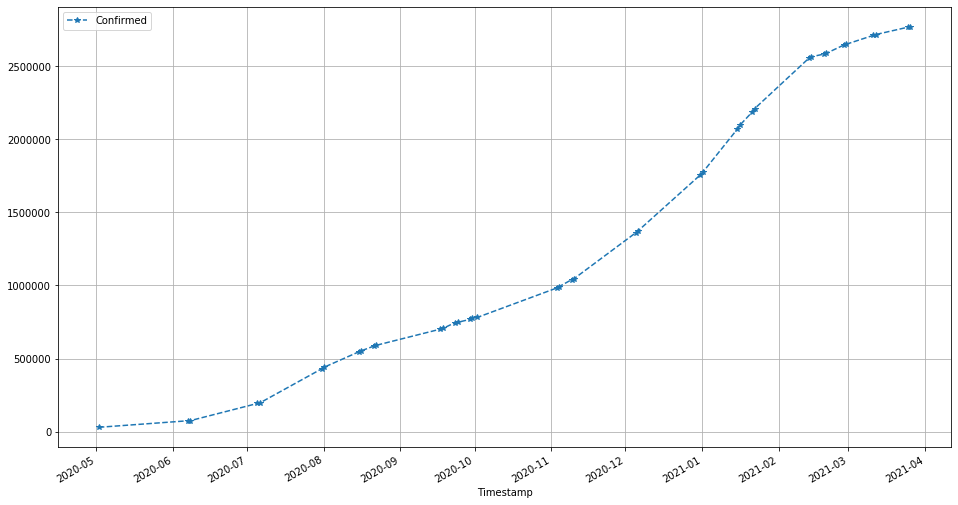

In [207]:
# Plot data for TX
is_tx = (covid_df["Province_State"] == "Texas")
covid_tx = covid_df[is_tx]
display(covid_tx.head(3))
covid_tx.sort_values(by="Timestamp").plot(x="Timestamp", y="Confirmed", figsize=(16, 9), style='*--')
grid()

In [208]:
STATE_NAMES = pd.read_csv('data/covid19/us_states.csv')
print(f"There are {len(STATE_NAMES)} US states. The first and last three, along with their two-letter postal code abbreviations, are as follows (in alphabetical order):")
display(STATE_NAMES.head(3))
print("...")
display(STATE_NAMES.tail(3))

There are 50 US states. The first and last three, along with their two-letter postal code abbreviations, are as follows (in alphabetical order):


,State,Name
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


...


,State,Name
47,WestVirginia,WV
48,Wisconsin,WI
49,Wyoming,WY


In [214]:
def get_us_states(df):
    #print(df.Province_State.unique())
    #print(STATE_NAMES.State)
    _is_us_state = (df['Province_State'].isin(STATE_NAMES.State))
    df = df[_is_us_state]
    display(df)
    df['ST'] = df['Province_State'].apply(lambda x: STATE_NAMES[STATE_NAMES.State == x]['Name'].iloc[0])
    df = df.drop(['Province_State'], axis = 1)    
    return df

covid_df_st = get_us_states(covid_df)
covid_df_st.head(10)

,Province_State,Country_Region,Timestamp,Confirmed
5,California,US,2021-03-26 05:30:37,3653168
49,Texas,US,2021-03-26 05:30:37,2769451
11,Florida,US,2021-03-26 05:30:37,2027429
36,NewYork,US,2021-03-26 05:30:37,1825069
17,Illinois,US,2021-03-26 05:30:37,1229806
...,...,...,...,...
1,Alaska,US,2021-03-11 05:30:58,59863
57,Wyoming,US,2021-03-11 05:30:58,55014
23,Maine,US,2021-03-11 05:30:58,46261
15,Hawaii,US,2021-03-11 05:30:58,28831


ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country_Region,Timestamp,Confirmed,ST
5,US,2021-03-26 05:30:37,3653168,CA
49,US,2021-03-26 05:30:37,2769451,TX
11,US,2021-03-26 05:30:37,2027429,FL
36,US,2021-03-26 05:30:37,1825069,NY
17,US,2021-03-26 05:30:37,1229806,IL
12,US,2021-03-26 05:30:37,1051361,GA
40,US,2021-03-26 05:30:37,1006171,OH
43,US,2021-03-26 05:30:37,1002909,PA
37,US,2021-03-26 05:30:37,903374,NC
34,US,2021-03-26 05:30:37,881882,NJ


In [243]:
# Mother of all chains
# get list of States orderderd by max value by state
covid19_rankings = covid_df_st.groupby('ST').agg({'Confirmed' : 'max'}).reset_index().sort_values(by='Confirmed', ascending = False)['ST'].tolist()
print ('Top 10 States :', covid19_rankings[:10])

Top 10 States : ['CA', 'TX', 'FL', 'NY', 'IL', 'GA', 'OH', 'PA', 'NC', 'NJ']


In [216]:
def resample_daily(df):
    # This implementation is a bit weird, due to a known issue: https://github.com/pandas-dev/pandas/issues/28313
    df_r = df.sort_values(by=["ST", "Timestamp"]) \
             .set_index("Timestamp") \
             .groupby("ST", group_keys=False) \
             .resample("1D", closed="right") \
             .ffill() \
             .reset_index()
    return df_r.sort_values(by=["ST", "Timestamp"]).reset_index(drop=True)
    
covid_df_daily = resample_daily(covid_df_st)
covid_df_daily[covid_df_daily["ST"] == "TX"].head(10)

,Timestamp,Country_Region,Confirmed,ST
13818,2020-05-03,US,29970,TX
13819,2020-05-04,US,29970,TX
13820,2020-05-05,US,29970,TX
13821,2020-05-06,US,29970,TX
13822,2020-05-07,US,29970,TX
13823,2020-05-08,US,29970,TX
13824,2020-05-09,US,29970,TX
13825,2020-05-10,US,29970,TX
13826,2020-05-11,US,29970,TX
13827,2020-05-12,US,29970,TX


In [217]:
def daily_windowed_avg(df, days):
    _df = df.copy()
    _df = _df.sort_values(by=['Timestamp'])
    _df['Avg'] = _df.groupby('ST')['Confirmed'].transform(lambda x: x.rolling(days).mean().astype(float))
    _df.reset_index(drop=True)
    _df = _df.dropna()
    _df['Avg'] = _df['Avg'].astype(float)    
    return _df

In [220]:
sts = ["CA", "TX", "NY"]
print('Check for states ', sts)
is_before = covid_df_daily["ST"].isin(sts)
display(covid_df_daily[is_before])

print('=== Your results (days=3) ===')
covid_df_daily_avg = daily_windowed_avg(covid_df_daily, 3)
is_after = covid_df_daily["ST"].isin(sts)
display(covid_df_daily_avg[is_after])

Check for states  ['CA', 'TX', 'NY']


,Timestamp,Country_Region,Confirmed,ST
1316,2020-05-03,US,52536,CA
1317,2020-05-04,US,52536,CA
1318,2020-05-05,US,52536,CA
1319,2020-05-06,US,52536,CA
1320,2020-05-07,US,52536,CA
...,...,...,...,...
14142,2021-03-23,US,2715993,TX
14143,2021-03-24,US,2715993,TX
14144,2021-03-25,US,2715993,TX
14145,2021-03-26,US,2766259,TX


=== Your results (days=3) ===
ipykernel_launcher:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Timestamp,Country_Region,Confirmed,ST,Avg
1318,2020-05-05,US,52536,CA,5.253600e+04
10859,2020-05-05,US,308314,NY,3.083140e+05
13820,2020-05-05,US,29970,TX,2.997000e+04
10860,2020-05-06,US,308314,NY,3.083140e+05
1319,2020-05-06,US,52536,CA,5.253600e+04
...,...,...,...,...,...
1643,2021-03-26,US,3650638,CA,3.626781e+06
14145,2021-03-26,US,2766259,TX,2.732748e+06
1644,2021-03-27,US,3653168,CA,3.639553e+06
14146,2021-03-27,US,2769451,TX,2.750568e+06


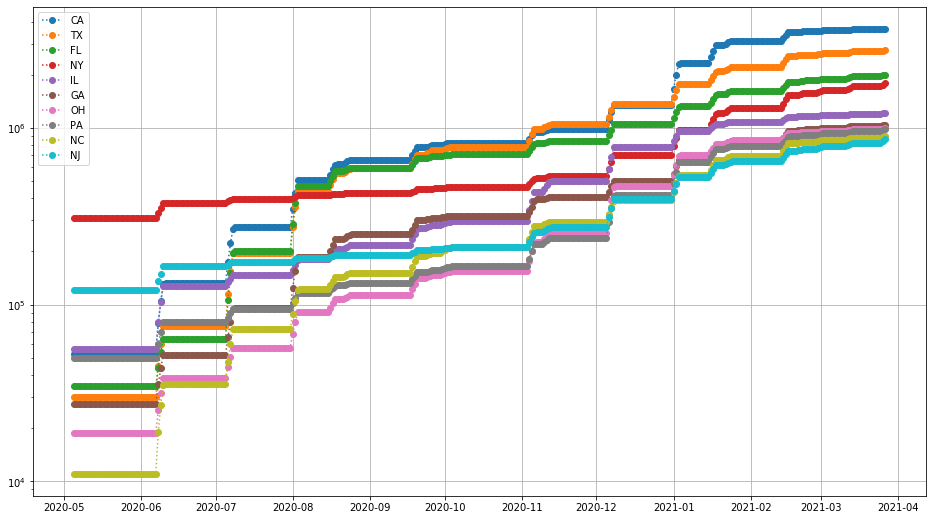

In [244]:

def viz_by_state(col, df, states, figsize=(16, 9), logy=False):
    from matplotlib.pyplot import figure, plot, semilogy, legend, grid
    figure(figsize=figsize)
    plotter = plot if not logy else semilogy
    for s in states:
        df0 = df[df["ST"] == s].sort_values(by="Timestamp")
        plotter(df0["Timestamp"], df0[col], "o:")
    legend(states)
    grid()
    
TOP_K = 10
viz_by_state("Avg", covid_df_daily_avg, covid19_rankings[:TOP_K], logy=True)